### An organization decides to hire an employee and the question is how much salary to offer to the candidate, based on credentials, experience and demographic details. The data can be downloaded from: http://archive.ics.uci.edu/ml/datasets/Adult   The data has one file "SalaryData.csv". This file contains the historical census data dataof 32,561 working professionals from all over the world indicating whether they earnmore than 50 k or not.Use traditional ML algorithms to predict the salary more than 50K or not. Also build aneural network model to see if it improves the prediction accuracy.

## Import libraries and packages

In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, kendalltau
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


## Import data

In [245]:
adult=pd.read_csv(r"C:\Users\Owner\Desktop\PGD DSML\python\adult.csv")

In [246]:
adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## EDA

In [247]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [248]:
adult.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [249]:
adult.shape

(48842, 15)

In [250]:
adult.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [251]:
adult.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [252]:
adult.isin(['?']).sum()/len(adult)*100

age                0.000000
workclass          5.730724
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         5.751198
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     1.754637
income             0.000000
dtype: float64

In [253]:
newdf=adult.replace('?', np.nan)

In [254]:
newdf.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [255]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [256]:
newdf.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [257]:
newdf.skew()

C:\Users\Owner\AppData\Local\Temp/ipykernel_10324/2108017343.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  newdf.skew()


age                 0.557580
fnlwgt              1.438892
educational-num    -0.316525
capital-gain       11.894659
capital-loss        4.569809
hours-per-week      0.238750
dtype: float64

In [258]:
newdf.replace(np.nan, 0, inplace=True)

In [259]:
newdf['workclass'].fillna(newdf['workclass'].mode()[0], inplace=True)

In [260]:
newdf['occupation'].fillna(newdf['occupation'].mode()[0], inplace=True)

In [261]:
newdf['native-country'].fillna(newdf['native-country'].mode()[0], inplace=True)

In [262]:
newdf.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

<=50K    76.071823
>50K     23.928177
Name: income, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


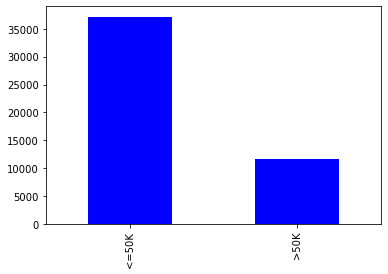

In [263]:
df1 = newdf["income"].value_counts(normalize = True)
print(df1*100)
df2 = newdf["income"].value_counts().plot(kind = 'bar',color = "blue")
print(df2)

## countplot showing how many people earn above 50K and below 50 K

<AxesSubplot:>

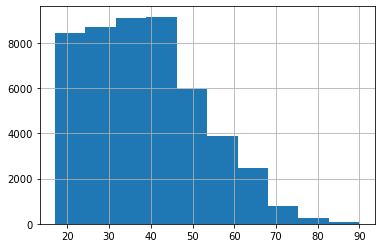

In [264]:
newdf['age'].hist()

## histogram showing no of people in different age groups

<AxesSubplot:xlabel='income', ylabel='age'>

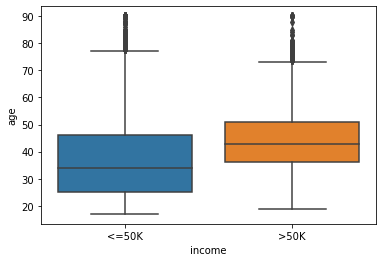

In [265]:
sns.boxplot(x='income',y='age',data=newdf)

## boxplot showing at age of 35 maximum people are earning less than 50K and at age of 40 average people are earning greater than 50k

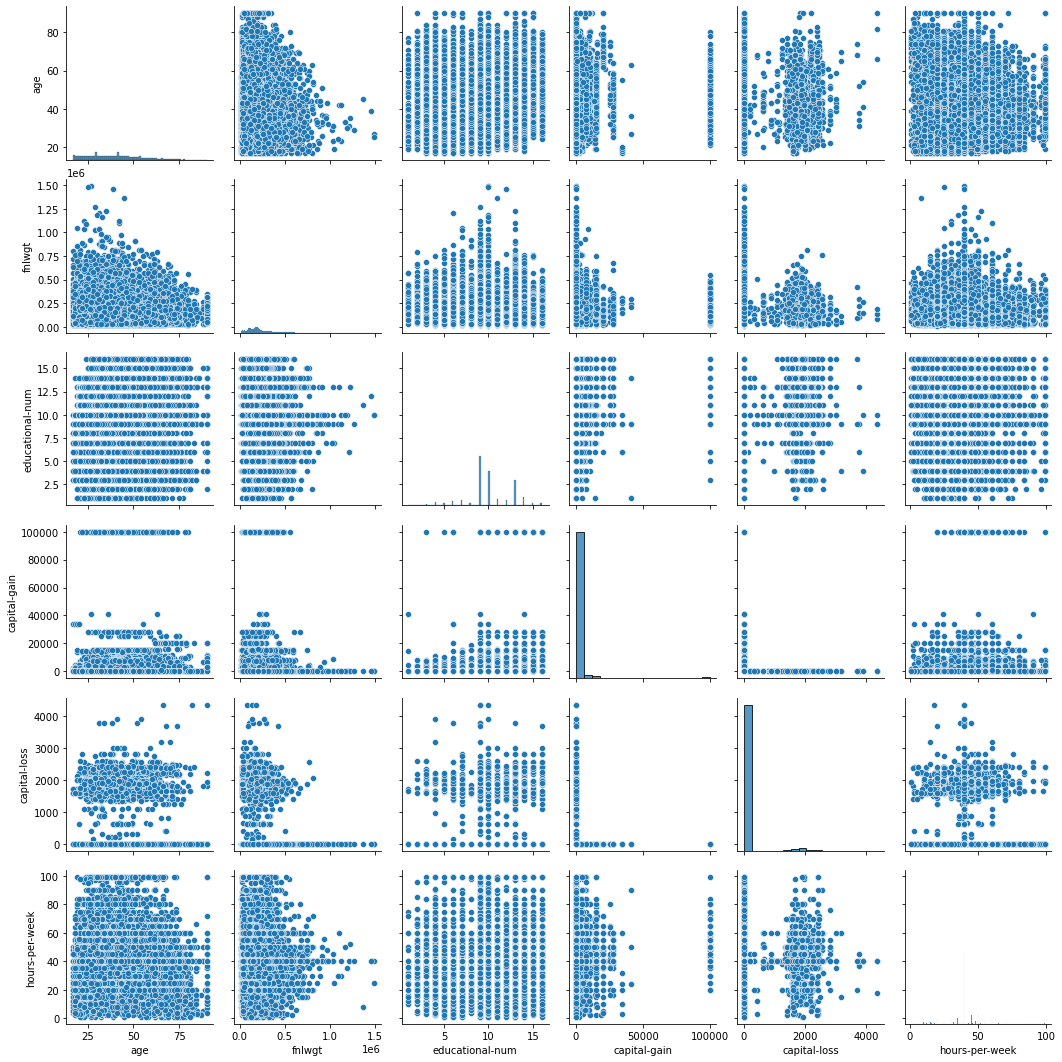

In [266]:
sns.pairplot(newdf)

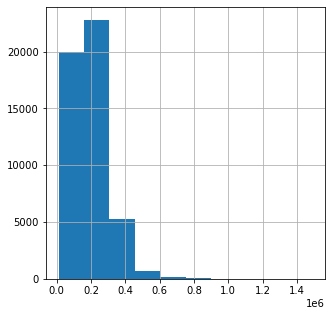

In [267]:
newdf['fnlwgt'].hist(figsize = (5,5))
plt.show()

## Distribution of final weights

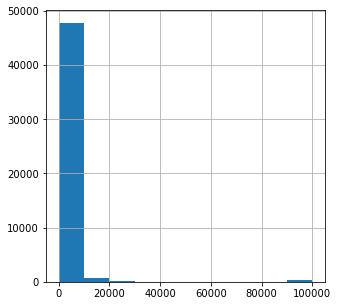

In [268]:
newdf['capital-gain'].hist(figsize=(5,5))
plt.show()

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


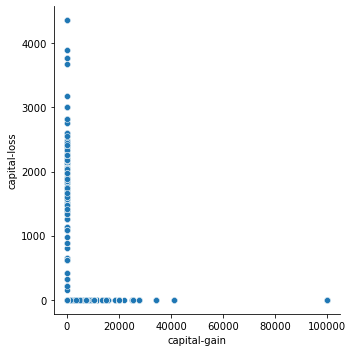

In [269]:
sns.relplot('capital-gain','capital-loss',data= newdf)
plt.xlabel('capital-gain')
plt.ylabel('capital-loss')
plt.show()

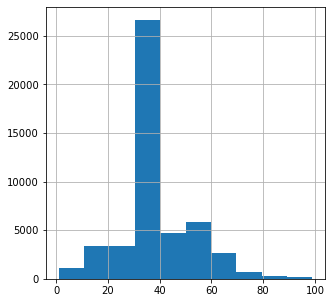

In [270]:
newdf['hours-per-week'].hist(figsize=(5,5))
plt.show()

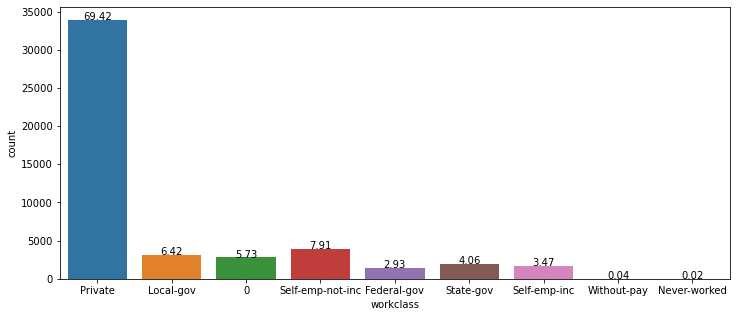

In [271]:
plt.figure(figsize=(12,5))

total = float(len(newdf['income']))

a = sns.countplot(x='workclass',data=newdf)

for f in a.patches:
    height = f.get_height()
    a.text(f.get_x() + f.get_width()/2., height+3, '{:1.2f}'.format((height/total)*100),ha="center")
plt.show()

## distribution of people in various workclasses

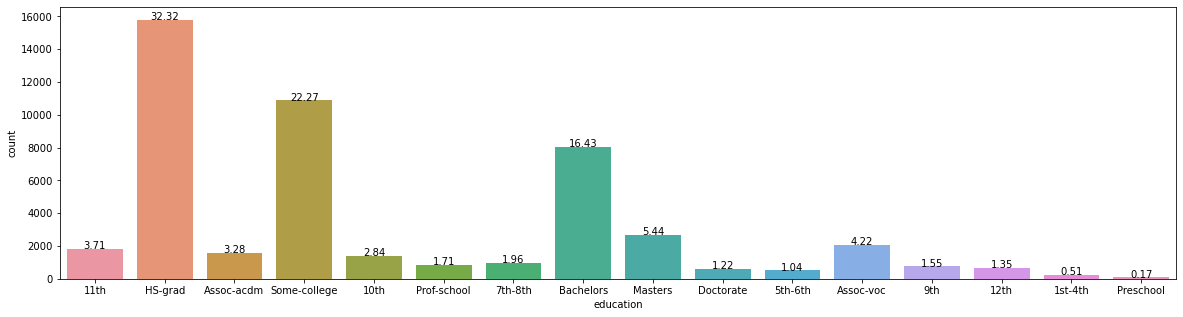

In [272]:
plt.figure(figsize=(20,5))

a= float(len(['income']))

a= sns.countplot(x='education',data=newdf)
for s in a.patches:
    height = s.get_height()
    a.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')
plt.show()

## educationwise distribution of people

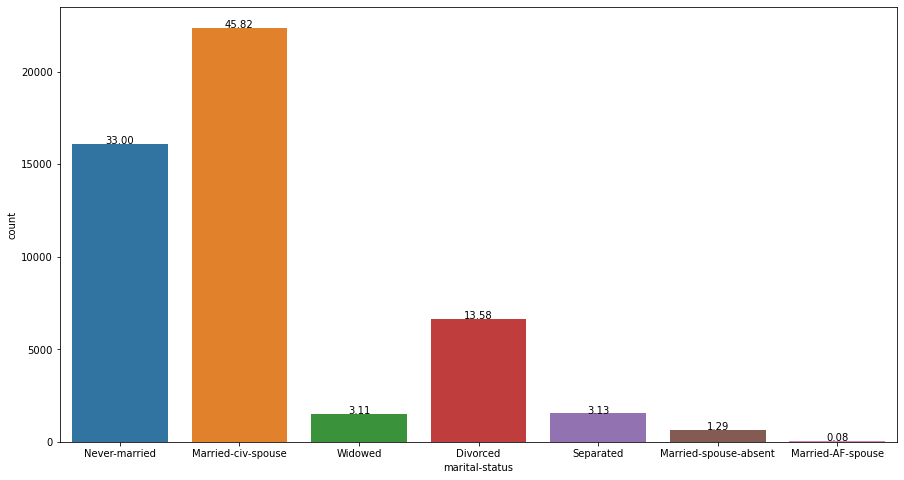

In [273]:
plt.figure(figsize=(15,8))
total = float(len(newdf) )

ax = sns.countplot(x="marital-status", data=newdf)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

## Marital status wise distribution

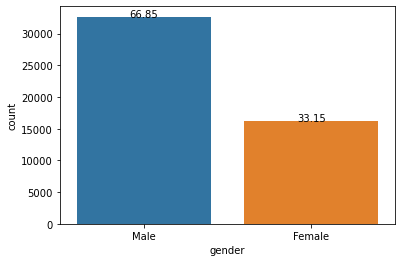

In [274]:
total = float(len(newdf) )

ax = sns.countplot(x="gender", data=newdf)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

## Genderwise distribution

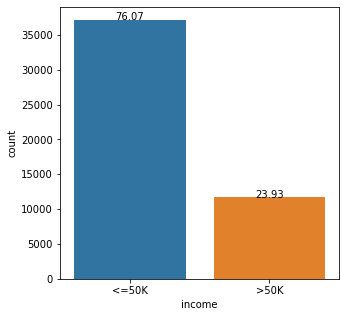

In [275]:
plt.figure(figsize=(5,5))
total = float(len(newdf) )

ax = sns.countplot(x="income", data=newdf)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

## income wise distribution

Text(0.5, 1.0, 'workclass vs count')

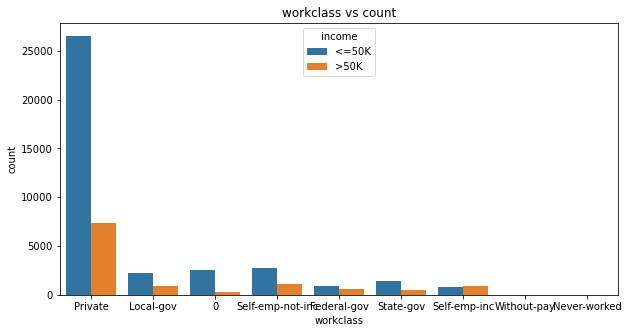

In [276]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='workclass',hue ='income',data=newdf).set_title("workclass vs count")

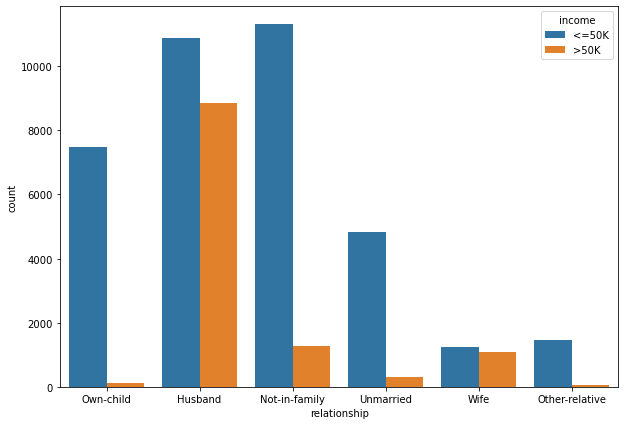

In [277]:
plt.figure(figsize=(10,7))
sns.countplot(x="relationship", hue="income",
            data=newdf);

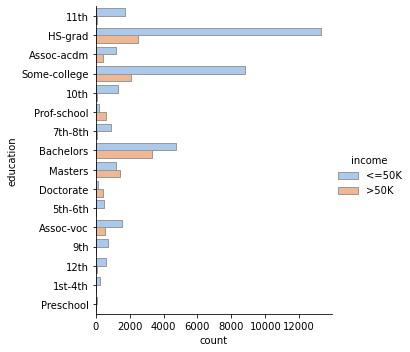

In [278]:
sns.catplot(y="education", hue="income", kind="count",
            palette="pastel", edgecolor=".6",
            data=newdf);

<AxesSubplot:>

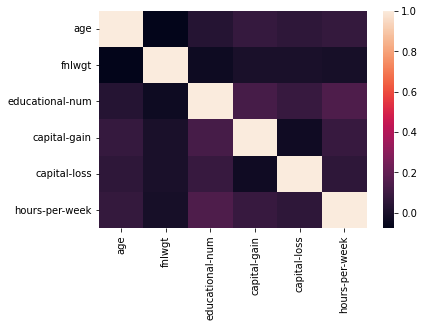

In [279]:
sns.heatmap(newdf.corr())

In [280]:
newdf['income']=newdf['income'].map({'<=50K': 0, '>50K': 1})

In [281]:
newdf.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,0,103497,Some-college,10,Never-married,0,Own-child,White,Female,0,0,30,United-States,0


## label Encoding

In [282]:
from sklearn.preprocessing import LabelEncoder

In [283]:
from sklearn import preprocessing

In [284]:
label_encoder = preprocessing.LabelEncoder()

In [285]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.6+ MB


In [286]:
newdf['workclass'].unique()

array(['Private', 'Local-gov', 0, 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [287]:
newdf['workclass']=newdf['workclass'].map({'Private':'Private','Local-gov':'Local-gov', 0:'0','Self-emp-not-inc':'Self-emp-not-inc','Federal-gov':'Federal-gov','State-gov':'State-gov','Self-emp-inc':'Self-emp-inc','Without-pay':'Without-pay','Never-worked':'Never-worked'})

In [288]:
newdf['workclass']= label_encoder.fit_transform(newdf['workclass'])

In [289]:
newdf['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [290]:
newdf['education']= label_encoder.fit_transform(newdf['education'])

In [291]:
newdf['marital-status']= label_encoder.fit_transform(newdf['marital-status'])

In [292]:
newdf['occupation']=newdf['occupation'].map({'Machine-op-inspct':'Machine-op-inspct','Farming-fishing':'Farming-fishing','Protective-serv':'Protective-serv', 0:'0','Other-service':'Other-service','Prof-specialty':'Prof-specialty','Craft-repair':'Craft-repair','Adm-clerical':'Adm-clerical','Exec-managerial':'Exec-managerial','Tech-support':'Tech-support','Sales':'Sales','Priv-house-serv':'Priv-house-serv','Transport-moving':'Transport-moving','Handlers-cleaners':'Handlers-cleaners','Armed-Forces':'Armed-Forces'})

In [293]:
newdf['occupation']= label_encoder.fit_transform(newdf['occupation'])

In [294]:
newdf['occupation'].unique()

array([ 7,  5, 11,  0,  8, 10,  3,  1,  4, 13, 12,  9, 14,  6,  2])

In [295]:
newdf['relationship']= label_encoder.fit_transform(newdf['relationship'])

In [296]:
newdf['race']= label_encoder.fit_transform(newdf['race'])

In [297]:
newdf['gender']= label_encoder.fit_transform(newdf['gender'])

In [298]:
newdf['native-country'].unique()

array(['United-States', 0, 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [299]:
newdf['native-country']=newdf['native-country'].map({'United-States':'United-States',0:'0','Peru':'Peru','Guatemala':'Guatemala','Mexico':'Mexico','Dominican-Republic':'Dominican-Republic','Ireland':'Ireland','Germany':'Germany','Philippines':'Philippines','Thailand':'Thailand','Haiti':'Haiti','El-Salvador':'El-Salvador','Puerto-Rico':'Puerto-Rico','Vietnam':'Vietnam','South':'South','Columbia':'Columbia','Japan':'Japan','India':'India','Cambodia':'Cambodia','Poland':'Poland','Laos':'Laos','England':'England','Cuba':'Cuba','Taiwan':'Taiwan','Italy':'Italy','Canada':'Canada','Portugal':'Portugal','China':'China','Nicaragua':'Nicaragua','Honduras':'Honduras','Iran':'Iran','Scotland':'Scotland','Jamaica':'Jamaica','Ecuador':'Ecuador','Yugoslavia':'Yugoslavia','Hungary':'Hungary','Hong':'Hong','Greece':'Greece','Trinadad&Tobago':'Trinadad&Tobago','Outlying-US(Guam-USVI-etc)':'Outlying-US(Guam-USVI-etc)','France':'France','Holand-Netherlands':'Holand-Netherlands'})

In [300]:
newdf['native-country']= label_encoder.fit_transform(newdf['native-country'])

In [301]:
newdf.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

## Train test split

In [302]:
newdf.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,39,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,39,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,39,1
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,39,1
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,39,0


In [319]:
newdf= newdf.drop('relationship',axis=1)

In [320]:
X=newdf.drop('income',axis=1)
Y=newdf[['income']]

In [321]:
X

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,4,226802,1,7,4,7,2,1,0,0,40,39
1,38,4,89814,11,9,2,5,4,1,0,0,50,39
2,28,2,336951,7,12,2,11,4,1,0,0,40,39
3,44,4,160323,15,10,2,7,2,1,7688,0,40,39
4,18,0,103497,15,10,4,0,4,0,0,0,30,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,4,257302,7,12,2,13,4,0,0,0,38,39
48838,40,4,154374,11,9,2,7,4,1,0,0,40,39
48839,58,4,151910,11,9,6,1,4,0,0,0,40,39
48840,22,4,201490,11,9,4,1,4,1,0,0,20,39


In [322]:
Y

,income
0,0
1,0
2,1
3,1
4,0
...,...
48837,0
48838,1
48839,0
48840,0


In [323]:
from sklearn.model_selection import train_test_split 

In [324]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, 
                                                    random_state=2020,
                                                    stratify=Y)

In [325]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

In [326]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


## Decision tree classifier

In [344]:
clf = DecisionTreeClassifier(max_depth=3,
                             random_state=2021)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

[[10298   849]
 [ 1663  1843]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89     11147
           1       0.68      0.53      0.59      3506

    accuracy                           0.83     14653
   macro avg       0.77      0.72      0.74     14653
weighted avg       0.82      0.83      0.82     14653

0.8285675288336859


## Accuracy for Decision tree is 83%

## Random Forest classifier

In [345]:
from sklearn.ensemble import RandomForestClassifier


In [346]:
model_rf = RandomForestClassifier(random_state=1211,
                                  n_estimators=500,oob_score=True)
model_rf.fit( X_train , y_train )
y_pred = model_rf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

C:\Users\Owner\AppData\Local\Temp/ipykernel_10324/899047758.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit( X_train , y_train )


[[10365   782]
 [ 1326  2180]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     11147
           1       0.74      0.62      0.67      3506

    accuracy                           0.86     14653
   macro avg       0.81      0.78      0.79     14653
weighted avg       0.85      0.86      0.85     14653

0.8561386746741282


## Accuracy for random forest classifier is 86%

In [347]:
from sklearn.metrics import roc_curve, roc_auc_score


In [348]:
y_pred_prob = model_rf.predict_proba(X_test)[:,1]

In [349]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)


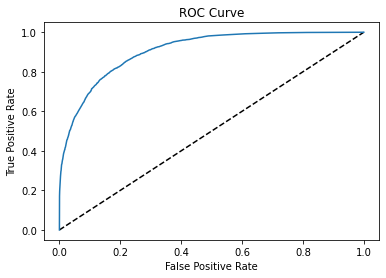

0.9072936827054888

In [350]:
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
roc_auc_score(y_test, y_pred_prob)

## XGBoost Classifier

In [351]:
from xgboost import XGBClassifier

In [352]:
xgb = XGBClassifier(random_state=2021)
xgb.fit(X_train,y_train)

y_pred = xgb.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

C:\Users\Owner\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[21:54:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[10472   675]
 [ 1226  2280]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     11147
           1       0.77      0.65      0.71      3506

    accuracy                           0.87     14653
   macro avg       0.83      0.79      0.81     14653
weighted avg       0.87      0.87      0.87     14653

0.87026547464683


## Accuracy for XGB is 87%

In [353]:
y_pred_prob = xgb.predict_proba(X_test)[:,1]

In [354]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

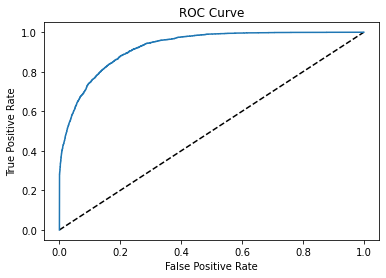

0.9255824678871387

In [355]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
roc_auc_score(y_test, y_pred_prob)

In [356]:
X

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,4,226802,1,7,4,7,2,1,0,0,40,39
1,38,4,89814,11,9,2,5,4,1,0,0,50,39
2,28,2,336951,7,12,2,11,4,1,0,0,40,39
3,44,4,160323,15,10,2,7,2,1,7688,0,40,39
4,18,0,103497,15,10,4,0,4,0,0,0,30,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,4,257302,7,12,2,13,4,0,0,0,38,39
48838,40,4,154374,11,9,2,7,4,1,0,0,40,39
48839,58,4,151910,11,9,6,1,4,0,0,0,40,39
48840,22,4,201490,11,9,4,1,4,1,0,0,20,39


## Support Vector Machine

In [357]:
from sklearn.svm import SVC

In [358]:
svc = SVC(probability = True,kernel='rbf')
fitSVC = svc.fit(X_train, y_train)
y_pred = fitSVC.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print(accuracy_score(y_test, y_pred))

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[[11127    20]
 [ 2925   581]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88     11147
           1       0.97      0.17      0.28      3506

    accuracy                           0.80     14653
   macro avg       0.88      0.58      0.58     14653
weighted avg       0.83      0.80      0.74     14653

0.7990172660888555


## Accuracy for SVM is 80%

## Logistic regression

In [359]:
from sklearn.linear_model import LogisticRegression

In [360]:
lr = LogisticRegression(random_state=2021)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [361]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87     11147
           1       0.64      0.30      0.41      3506

    accuracy                           0.79     14653
   macro avg       0.72      0.62      0.64     14653
weighted avg       0.77      0.79      0.76     14653



## Accuracy for Logistic regression is 79%

In [362]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[10545   602]
 [ 2457  1049]]
0.7912372892922951


In [363]:
X_train.shape

(34189, 13)

In [364]:
y_train.shape

(34189, 1)

## Neural Network

In [335]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [336]:
import tensorflow as tf

In [337]:
from tensorflow.keras.layers import Dropout

In [369]:
model.add(Dense(8, activation = 'relu', input_dim = 13))



model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))

model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [370]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

In [371]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_12 (Bat  (None, 13)               52        
 chNormalization)                                                
                                                                 
 dense_18 (Dense)            (None, 100)               1400      
                                                                 
 batch_normalization_13 (Bat  (None, 100)              400       
 chNormalization)                                                
                                                                 
 dense_19 (Dense)            (None, 50)                5050      
                                                                 
 batch_normalization_14 (Bat  (None, 50)               200       
 chNormalization)                                                
                                                      

In [372]:
model.fit(x_train, y_train, batch_size=32, epochs = 50,verbose = 1)

Epoch 1/50
1069/1069 [==============================] - 7s 5ms/step - loss: 0.4548 - accuracy: 0.7754
Epoch 2/50
1069/1069 [==============================] - 5s 4ms/step - loss: 0.3716 - accuracy: 0.8337
Epoch 3/50
1069/1069 [==============================] - 4s 4ms/step - loss: 0.3606 - accuracy: 0.8350
Epoch 4/50
1069/1069 [==============================] - 4s 4ms/step - loss: 0.3542 - accuracy: 0.8391
Epoch 5/50
1069/1069 [==============================] - 4s 4ms/step - loss: 0.3498 - accuracy: 0.8388
Epoch 6/50
1069/1069 [==============================] - 4s 4ms/step - loss: 0.3464 - accuracy: 0.8414
Epoch 7/50
1069/1069 [==============================] - 4s 4ms/step - loss: 0.3450 - accuracy: 0.8416
Epoch 8/50
1069/1069 [==============================] - 4s 4ms/step - loss: 0.3414 - accuracy: 0.8440
Epoch 9/50
1069/1069 [==============================] - 4s 4ms/step - loss: 0.3419 - accuracy: 0.8404
Epoch 10/50
1069/1069 [==============================] - 4s 4ms/step - loss: 0.341

## Accuracy for neural network is 84%

## Accuracy for all classification models

### Decision tree- 83%
### Random forest-86%
### XGB- 87%
### SVM- 80%
### Logistic -79%

### Neural network-84%

### From above results we get to know that accuracy is highest for XGBoost classifier followed by Random Forest Classifier. 
### Neural network is having 84% Accuracy which is greater than Decision tree , SVM and Logistic Regression.